# Introduction: Importing Necessary Libraries
And having a first look at the data.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datathon-2024/sample_submission.csv
/kaggle/input/datathon-2024/test_x.csv
/kaggle/input/datathon-2024/train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score, r2_score
from lightgbm import LGBMRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import xgboost as xgb

In [3]:
# Importing the datasets
datathon_train = pd.read_csv("/kaggle/input/datathon-2024/train.csv", low_memory=False)
datathon_test = pd.read_csv("/kaggle/input/datathon-2024/test_x.csv", low_memory=False)

# First sight at the dataset
datathon_train.head()

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,...,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


In [4]:
# Summary statistics of the train dataset
print(datathon_train.describe(), "\n")

# Examining the dataset for datatypes and missing values
print(datathon_train.info())

       Basvuru Yili  Degerlendirme Puani  Burslu ise Burs Yuzdesi  \
count  65125.000000         65124.000000             22440.000000   
mean    2018.277298            32.086466                34.226181   
std        2.669979            18.139239                41.632412   
min     2014.000000             0.000000                 0.000000   
25%     2016.000000            18.000000                 0.000000   
50%     2019.000000            29.000000                 0.000000   
75%     2021.000000            44.000000                75.000000   
max     2022.000000           102.000000               100.000000   

                 id  
count  65125.000000  
mean   32562.000000  
std    18800.112478  
min        0.000000  
25%    16281.000000  
50%    32562.000000  
75%    48843.000000  
max    65124.000000   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-N

In [5]:
# Calculating the percentage of the missing values 
missing_percentage = datathon_train.isnull().sum() / len(datathon_train) * 100

# Getting the columns that have higher than %75 of missing data to determine the columns to drop
high_missing_columns = missing_percentage[missing_percentage > 75]
print(high_missing_columns, "\n")

# Dropping the columns
datathon_train.drop(high_missing_columns.index, axis=1)
datathon_train.columns.tolist()

Lise Adi Diger                                               92.732438
Lise Bolum Diger                                             97.656814
Hangi STK'nin Uyesisiniz?                                    76.035317
Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?    77.583109
Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite        99.356622
dtype: float64 



['Basvuru Yili',
 'Degerlendirme Puani',
 'Cinsiyet',
 'Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Universite Turu',
 'Burslu ise Burs Yuzdesi',
 'Burs Aliyor mu?',
 'Bölüm',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Daha Once Baska Bir Universiteden Mezun Olmus',
 'Lise Adi',
 'Lise Adi Diger',
 'Lise Sehir',
 'Lise Turu',
 'Lise Bolumu',
 'Lise Bolum Diger',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Burs Aldigi Baska Kurum',
 'Baska Kurumdan Aldigi Burs Miktari',
 'Anne Egitim Durumu',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Egitim Durumu',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Kardes Sayisi',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Uye Oldugunuz Kulubun Ismi',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 "Hangi STK'nin Uyesisiniz?",
 'Stk Projesine Katildiniz Mi?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi

In [6]:
print(datathon_train["Degerlendirme Puani"].mode())
print(datathon_train["Degerlendirme Puani"].isnull().sum())

mean_of_grades = datathon_train["Degerlendirme Puani"].mean()

print(mean_of_grades)

datathon_train["Degerlendirme Puani"] = datathon_train["Degerlendirme Puani"].fillna(mean_of_grades)

print(datathon_train["Degerlendirme Puani"].isnull().sum())

0    28.0
Name: Degerlendirme Puani, dtype: float64
1
32.08646581905288
0


In [7]:
datathon_test.head()

,Basvuru Yili,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2023,Kadın,21.06.2002 00:00,Amasya,Amasya,Munzur Üniversitesi,Devlet,NaN,Hayır,Sosyal Hizmet,...,Takım Oyuncusu,Evet,Kızılay da gönüllü dağıtım,NaN,Hayır,-,Evet,NaN,NaN,0
1,2023,Kadın,11.05.2004 00:00,Konya,Konya,Hacettepe Üniversitesi,Devlet,NaN,Hayır,Uluslararası İlişkiler,...,Bireysel Spor,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,1
2,2023,Erkek,24.04.2002 00:00,İstanbul,İstanbul,Kapadokya Üniversitesi,Özel,NaN,Evet,Diğer,...,Bireysel Spor,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,2
3,2023,Erkek,11.03.2003 00:00,Mardin,Mardin,Mardin Artuklu Üniversitesi,Devlet,NaN,Hayır,İslami İlimler,...,-,Evet,Lise gezilerde liderlik yapıyordum,NaN,Hayır,-,Hayır,NaN,NaN,3
4,2023,Erkek,26.01.2002 00:00,Samsun,İstanbul,Boğaziçi Üniversitesi,Devlet,NaN,Hayır,İşletme,...,-,Evet,"Toplum Gönüllüleri Vakfı'nda ""Yol Arkadaşım"" P...",NaN,Evet,"12 aydır, yolculuğuna bir yıl önce başlamış ol...",Evet,NaN,NaN,4


In [8]:
datathon_test.drop(high_missing_columns.index, axis=1)
print(datathon_test.columns)

Index(['Basvuru Yili', 'Cinsiyet', 'Dogum Tarihi', 'Dogum Yeri',
       'Ikametgah Sehri', 'Universite Adi', 'Universite Turu',
       'Burslu ise Burs Yuzdesi', 'Burs Aliyor mu?', 'Bölüm',
       'Universite Kacinci Sinif', 'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Adi Diger', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Lise Bolum Diger', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?', 'Burs Aldigi Baska Kurum',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Uye Oldugunuz Kulubun Ismi',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Hangi STK'nin Uyesisiniz?', 'Stk Projesine Katildin

In [9]:
datathon_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11049 entries, 0 to 11048
Data columns (total 43 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               11049 non-null  int64  
 1   Cinsiyet                                                   11049 non-null  object 
 2   Dogum Tarihi                                               11049 non-null  object 
 3   Dogum Yeri                                                 11049 non-null  object 
 4   Ikametgah Sehri                                            11049 non-null  object 
 5   Universite Adi                                             11049 non-null  object 
 6   Universite Turu                                            11049 non-null  object 
 7   Burslu ise Burs Yuzdesi                                    0 non-null      float64
 8   Burs A

# Data Preprocessing and Feature Engineering

In [10]:
cinsiyet_encoder = LabelEncoder()

datathon_train['Cinsiyet'] = datathon_train['Cinsiyet'].str.lower()
gender_mode_train = datathon_train['Cinsiyet'].mode()[0]
datathon_test['Cinsiyet'] = datathon_test['Cinsiyet'].fillna(gender_mode_train)
datathon_train['Cinsiyet_enc'] = cinsiyet_encoder.fit_transform(datathon_train['Cinsiyet'])
print(datathon_train['Cinsiyet_enc'].unique())

datathon_test["Cinsiyet"] = datathon_test["Cinsiyet"].str.lower()
gender_mode_test = datathon_test['Cinsiyet'].mode()[0]
datathon_test['Cinsiyet'] = datathon_test['Cinsiyet'].fillna(gender_mode_test)
datathon_test["Cinsiyet_enc"] = cinsiyet_encoder.transform(datathon_test["Cinsiyet"])
print(datathon_test["Cinsiyet_enc"].unique())

[1 2 0 3]
[2 1 0]


In [11]:
# Converting the birthdate column to datetime data type
datathon_train['Dogum Tarihi'] = pd.to_datetime(datathon_train['Dogum Tarihi'], errors='coerce')

# Extracting the birth year from birthdate column
datathon_train['Dogum_yili'] = datathon_train['Dogum Tarihi'].dt.year

datathon_train["Yas"] = 2024 - datathon_train['Dogum_yili']

datathon_train.loc[datathon_train['Yas'] < 21, 'Yas'] = 19

datathon_train.loc[datathon_train['Yas'] > 40, 'Yas'] = np.nan

mode_age_train = datathon_train['Yas'].mode()[0]

# Filling the missing values with median of years
datathon_train['Yas'] = datathon_train['Yas'].fillna(mode_age_train)

# Converting the birth year and the age column from float into the correct data type: int
datathon_train["Yas"] = datathon_train["Yas"].astype(int)

# Check all values
print(datathon_train['Dogum Tarihi'].dtype)
print(datathon_train['Dogum Tarihi'].head(), "\n")
print(datathon_train['Dogum_yili'].head())

datetime64[ns]
0   1994-04-06
1   1993-06-11
2   1986-01-15
3   1991-06-04
4          NaT
Name: Dogum Tarihi, dtype: datetime64[ns] 

0    1994.0
1    1993.0
2    1986.0
3    1991.0
4       NaN
Name: Dogum_yili, dtype: float64


In [12]:
# Test Data Birthdate
datathon_test['Dogum Tarihi'] = pd.to_datetime(datathon_test['Dogum Tarihi'], errors='coerce', dayfirst=True)
datathon_test['Dogum_yili'] = datathon_test['Dogum Tarihi'].dt.year

datathon_test["Yas"] = 2024 - datathon_test['Dogum_yili']

mode_year_test = datathon_test['Dogum_yili'].mode()[0]

datathon_test['Dogum_yili'] = datathon_test['Dogum_yili'].fillna(mode_year_test)
datathon_test['Dogum_yili'] = datathon_test['Dogum_yili'].astype(int)

In [13]:
print(sorted(list(datathon_train["Yas"].unique())), "\n")
print(sorted(list(datathon_test["Yas"].unique())))

[19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] 

[19, 20, 21, 22, 23, 24, 25, 26]


In [14]:
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 20:
        return 'Teen'
    elif 20 <= age <= 22:
        return 'Young Adult'
    elif 23 <= age <= 25:
        return 'Adult'
    elif 26 <= age:
        return 'Mature'
    else:
        return 'Unknown'

datathon_train['Yas_kategori'] = datathon_train['Yas'].apply(categorize_age)
datathon_test['Yas_kategori'] = datathon_test['Yas'].apply(categorize_age)

In [15]:
age_labeler = LabelEncoder()

datathon_train['Yas_kategori_enc'] = age_labeler.fit_transform(datathon_train['Yas_kategori'])
datathon_test['Yas_kategori_enc'] = age_labeler.transform(datathon_test['Yas_kategori'])

print(datathon_train['Yas_kategori_enc'].nunique() == datathon_test['Yas_kategori_enc'].nunique())

True


In [16]:
uni_turu_encoder = LabelEncoder()

uni_mod = datathon_train["Universite Turu"].mode()[0]
datathon_train["Universite Turu"] = datathon_train["Universite Turu"].fillna(uni_mod)
datathon_train["Universite Turu"] = datathon_train["Universite Turu"].str.lower()
datathon_train["Universite Turu_enc"] = uni_turu_encoder.fit_transform(datathon_train["Universite Turu"])

datathon_train["Universite Turu_enc"].unique()

array([1, 0])

In [17]:
uni_mod = datathon_test["Universite Turu"].mode()[0]
datathon_test["Universite Turu"] = datathon_test["Universite Turu"].fillna(uni_mod)
datathon_test["Universite Turu"] = datathon_test["Universite Turu"].str.lower()
datathon_test["Universite Turu_enc"] = uni_turu_encoder.transform(datathon_test["Universite Turu"])

datathon_test["Universite Turu_enc"].unique()

array([0, 1])

In [18]:
datathon_train['Universite Not Ortalamasi'] = datathon_train['Universite Not Ortalamasi'].str.lower()

datathon_train['Universite Not Ortalamasi'] = datathon_train['Universite Not Ortalamasi'].replace(
    ['ortalama bulunmuyor', 'not ortalaması yok', 'hazırlığım'], np.nan)

datathon_train['Universite Not Ortalamasi'] = datathon_train['Universite Not Ortalamasi'].replace('2.50 ve altı', 0)

datathon_train['Universite Not Ortalamasi'] = datathon_train['Universite Not Ortalamasi'].replace({
    '3.00 - 3.50': 3,
    '3.50 - 4.00': 4,
    '2.50 - 3.00': 2,
    '2.00 - 2.50': 1,
    '1.00 - 2.50': 0,
    '1.80 - 2.49': 1,
    '4.0-3.5': 4,
    '0 - 1.79': 0,
    '4-3.5': 4,
    '3.50-3': 3, 
    '3.00-2.50': 2,
    '3.00 - 4.00': 4,  
    '2.50 -3.00': 2,  
})

datathon_train['Universite Not Ortalamasi'] = pd.to_numeric(datathon_train['Universite Not Ortalamasi'], errors='coerce')

gpa_mode = datathon_train['Universite Not Ortalamasi'].mode()[0]

datathon_train['Universite Not Ortalamasi'] = datathon_train['Universite Not Ortalamasi'].fillna(gpa_mode)

print(datathon_train['Universite Not Ortalamasi'].unique())
print(datathon_train['Universite Not Ortalamasi'].dtype)

[3. 2. 0. 4. 1.]
float64


In [19]:
print(datathon_test['Universite Not Ortalamasi'].unique())

datathon_test['Universite Not Ortalamasi'] = datathon_test['Universite Not Ortalamasi'].replace('Hazırlığım', np.nan)

['2.50 - 2.99' 'Hazırlığım' '3.00 - 3.49' '1.80 - 2.49' '3.50 - 4.00'
 '0 - 1.79']


In [20]:
datathon_test['Universite Not Ortalamasi'] = datathon_test['Universite Not Ortalamasi'].replace({
    "2.50 - 2.99": 2,
    "3.00 - 3.49": 3,
    "1.80 - 2.49": 1,
    "3.50 - 4.00": 4,
    "0 - 1.79": 0
})

datathon_test['Universite Not Ortalamasi'] = pd.to_numeric(datathon_test['Universite Not Ortalamasi'], errors='coerce')

gpa_median = datathon_test['Universite Not Ortalamasi'].median()

datathon_test['Universite Not Ortalamasi'] = datathon_test['Universite Not Ortalamasi'].fillna(gpa_median)

print(datathon_test['Universite Not Ortalamasi'].unique())
print(datathon_test['Universite Not Ortalamasi'].dtype)

[2. 3. 1. 4. 0.]
float64


/tmp/ipykernel_36/3957044110.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datathon_test['Universite Not Ortalamasi'] = datathon_test['Universite Not Ortalamasi'].replace({


In [21]:
burs_aliyor_mu_le = LabelEncoder()

print(datathon_train["Burs Aliyor mu?"].unique())

datathon_train["Burs Aliyor mu?"] = datathon_train["Burs Aliyor mu?"].str.lower()

datathon_train["Burs Aliyor mu?_enc"] = burs_aliyor_mu_le.fit_transform(datathon_train["Burs Aliyor mu?"])

print(datathon_train["Burs Aliyor mu?_enc"].unique())

['Evet' 'Hayır' 'hayır' 'evet' 'EVET']
[0 1]


In [22]:
print(datathon_test["Burs Aliyor mu?"].unique())

datathon_test["Burs Aliyor mu?"] = datathon_test["Burs Aliyor mu?"].str.lower()

datathon_test["Burs Aliyor mu?_enc"] = burs_aliyor_mu_le.transform(datathon_test["Burs Aliyor mu?"])

print(datathon_test["Burs Aliyor mu?_enc"].unique())

['Hayır' 'Evet']
[1 0]


In [23]:
girisimcilik_kulubu_le = LabelEncoder()

datathon_train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"] = datathon_train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].str.lower()

entrepeneur_clubs_mode_value = datathon_train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].mode()[0]
datathon_train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"] = datathon_train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].fillna(entrepeneur_clubs_mode_value)

print(datathon_train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].unique())

datathon_train["girisim_kulubu_enc"] = girisimcilik_kulubu_le.fit_transform(datathon_train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"])

print(datathon_train["girisim_kulubu_enc"].unique())

['evet' 'hayır']
[0 1]


In [24]:
datathon_test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"] = datathon_test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].str.lower()

entrepeneur_clubs_mode_value = datathon_test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].mode()[0]
datathon_test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"] = datathon_test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].fillna(entrepeneur_clubs_mode_value)

print(datathon_test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].unique())

datathon_test["girisim_kulubu_enc"] = girisimcilik_kulubu_le.transform(datathon_test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"])

print(datathon_test["girisim_kulubu_enc"].unique())

['hayır' 'evet']
[1 0]


In [25]:
prof_spor_dali = LabelEncoder()

datathon_train["Profesyonel Bir Spor Daliyla Mesgul musunuz?"] = datathon_train["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].str.lower()

sports_mode_value = datathon_train["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].mode()[0]
datathon_train["Profesyonel Bir Spor Daliyla Mesgul musunuz?"] = datathon_train["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].fillna(sports_mode_value)

print(datathon_train["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].unique())

datathon_train["does_sports_enc"] = prof_spor_dali.fit_transform(datathon_train["Profesyonel Bir Spor Daliyla Mesgul musunuz?"])

print(datathon_train["does_sports_enc"].unique())

['evet' 'hayır']
[0 1]


In [26]:
datathon_test["Profesyonel Bir Spor Daliyla Mesgul musunuz?"] = datathon_test["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].str.lower()

sports_mode_value = datathon_test["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].mode()[0]
datathon_test["Profesyonel Bir Spor Daliyla Mesgul musunuz?"] = datathon_test["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].fillna(sports_mode_value)

print(datathon_test["Profesyonel Bir Spor Daliyla Mesgul musunuz?"].unique())

datathon_test["does_sports_enc"] = prof_spor_dali.transform(datathon_test["Profesyonel Bir Spor Daliyla Mesgul musunuz?"])

print(datathon_test["does_sports_enc"].unique())

['evet' 'hayır']
[0 1]


In [27]:
pd.set_option('future.no_silent_downcasting', True)

# Standardization
datathon_train["Lise Mezuniyet Notu"] = datathon_train["Lise Mezuniyet Notu"].replace({
    '3.50-3': 1,
    '3.00 - 4.00': 2,
    '3.00-2.50': .1,
    '2.50 ve altı': 0,
    '4.00-3.50': 2,
    '3.50-3.00': 2, 
    '69-55': 1,
    '100-85': 2,
    '84-70': 2,
    '54-45': 1,
    '44-0': 0,
    '75 - 100': 2,
    '50 - 75': 1,
    '25 - 50': 0,
    '0 - 25': 0,
    '50 - 74': 2,
    '25 - 49': 0,
    '0 - 24': 0,
    'Not ortalaması yok': np.nan
})

mode_score = datathon_train["Lise Mezuniyet Notu"].mode()[0]
datathon_train["Lise Mezuniyet Notu"] = datathon_train["Lise Mezuniyet Notu"].fillna(mode_score)

datathon_train["Lise Mezuniyet Notu"] = datathon_train["Lise Mezuniyet Notu"].astype(int)

print(datathon_train["Lise Mezuniyet Notu"].unique())
print(datathon_train["Lise Mezuniyet Notu"].dtype)

[1 2 0]
int64


In [28]:
# Standardization
datathon_test["Lise Mezuniyet Notu"] = datathon_test["Lise Mezuniyet Notu"].replace({
    '50 - 74': 1,
    "75 - 100": 2,
    "25 - 49": 0
})

test_mode_score = datathon_test["Lise Mezuniyet Notu"].mode()[0]
datathon_test["Lise Mezuniyet Notu"] = datathon_test["Lise Mezuniyet Notu"].fillna(test_mode_score)

datathon_test["Lise Mezuniyet Notu"] = datathon_test["Lise Mezuniyet Notu"].astype(int)

print(datathon_test["Lise Mezuniyet Notu"].unique())
print(datathon_test["Lise Mezuniyet Notu"].dtype)

[1 2 0]
int64


In [29]:
def clean_sibling_count(value):
    try:
        return pd.to_numeric(value, errors='coerce')
    except:
        return np.nan

datathon_train["Kardes Sayisi"] = datathon_train["Kardes Sayisi"].apply(clean_sibling_count)
datathon_test["Kardes Sayisi"] = datathon_test["Kardes Sayisi"].apply(clean_sibling_count)

median_train = datathon_train["Kardes Sayisi"].median()

datathon_train["Kardes Sayisi"].fillna(median_train)
datathon_test["Kardes Sayisi"].fillna(median_train)

scaler = StandardScaler()
datathon_train["Kardes Sayisi"] = scaler.fit_transform(datathon_train[["Kardes Sayisi"]])
datathon_test["Kardes Sayisi"] = scaler.transform(datathon_test[["Kardes Sayisi"]])

datathon_train["Kardes Sayisi"] = datathon_train["Kardes Sayisi"].astype(str)
datathon_test["Kardes Sayisi"] = datathon_test["Kardes Sayisi"].astype(str)

encoder = LabelEncoder()
datathon_train["Kardes Sayisi_enc"] = encoder.fit_transform(datathon_train["Kardes Sayisi"])
datathon_test["Kardes Sayisi_enc"] = encoder.transform(datathon_test["Kardes Sayisi"])

In [30]:
stk_uyesi = LabelEncoder()

datathon_train["Aktif olarak bir STK üyesi misiniz?"] = datathon_train["Aktif olarak bir STK üyesi misiniz?"].str.lower()

stk_member_mode = datathon_train["Aktif olarak bir STK üyesi misiniz?"].mode()[0]
datathon_train["Aktif olarak bir STK üyesi misiniz?"] = datathon_train["Aktif olarak bir STK üyesi misiniz?"].fillna(stk_member_mode)

print(datathon_train["Aktif olarak bir STK üyesi misiniz?"].unique())
datathon_train["stk_member_enc"] = stk_uyesi.fit_transform(datathon_train["Aktif olarak bir STK üyesi misiniz?"])

print(datathon_train["stk_member_enc"].unique())

['hayır' 'evet']
[1 0]


In [31]:
datathon_test["Aktif olarak bir STK üyesi misiniz?"] = datathon_test["Aktif olarak bir STK üyesi misiniz?"].str.lower()

stk_member_mode = datathon_train["Aktif olarak bir STK üyesi misiniz?"].mode()[0]
datathon_test["Aktif olarak bir STK üyesi misiniz?"] = datathon_test["Aktif olarak bir STK üyesi misiniz?"].fillna(stk_member_mode)
print(datathon_test["Aktif olarak bir STK üyesi misiniz?"].unique())
datathon_test["stk_member_enc"] = stk_uyesi.transform(datathon_test["Aktif olarak bir STK üyesi misiniz?"])

print(datathon_test["stk_member_enc"].unique())

['evet' 'hayır']
[0 1]


In [32]:
girisim_deneyimi = LabelEncoder()

mode_vals = datathon_train["Girisimcilikle Ilgili Deneyiminiz Var Mi?"].mode()[0]
datathon_train["Girisimcilikle Ilgili Deneyiminiz Var Mi?"] = datathon_train["Girisimcilikle Ilgili Deneyiminiz Var Mi?"].fillna(mode_vals)
datathon_train["Girisimcilikle Ilgili Deneyiminiz Var Mi?"].unique()
datathon_train["Girisimcilikle Ilgili Deneyiminiz Var Mi?_enc"] = girisim_deneyimi.fit_transform(datathon_train["Girisimcilikle Ilgili Deneyiminiz Var Mi?"])
print(datathon_train["Girisimcilikle Ilgili Deneyiminiz Var Mi?_enc"].unique())

[1 0]


In [33]:
mode_vals = datathon_train["Girisimcilikle Ilgili Deneyiminiz Var Mi?"].mode()[0]
datathon_test["Girisimcilikle Ilgili Deneyiminiz Var Mi?"] = datathon_test["Girisimcilikle Ilgili Deneyiminiz Var Mi?"].fillna(mode_vals)
datathon_test["Girisimcilikle Ilgili Deneyiminiz Var Mi?"].unique()
datathon_test["Girisimcilikle Ilgili Deneyiminiz Var Mi?_enc"] = girisim_deneyimi.transform(datathon_test["Girisimcilikle Ilgili Deneyiminiz Var Mi?"])

print(datathon_test["Girisimcilikle Ilgili Deneyiminiz Var Mi?_enc"].unique())

[1 0]


In [34]:
ing_biliyor_mu_le = LabelEncoder()

print(datathon_train["Ingilizce Biliyor musunuz?"].unique())
mode_eng = datathon_train["Ingilizce Biliyor musunuz?"].mode()[0]
datathon_train["Ingilizce Biliyor musunuz?"] = datathon_train["Ingilizce Biliyor musunuz?"].fillna(mode_eng)
print(datathon_train["Ingilizce Biliyor musunuz?"].nunique())
datathon_train["knows_eng_enc"] = ing_biliyor_mu_le.fit_transform(datathon_train["Ingilizce Biliyor musunuz?"])
print(datathon_train["knows_eng_enc"].unique())

[nan 'Evet' 'Hayır']
2
[0 1]


In [35]:
print(datathon_test["Ingilizce Biliyor musunuz?"].unique())
mode_eng = datathon_test["Ingilizce Biliyor musunuz?"].mode()[0]
datathon_test["Ingilizce Biliyor musunuz?"] = datathon_test["Ingilizce Biliyor musunuz?"].fillna(mode_eng)
print(datathon_test["Ingilizce Biliyor musunuz?"].nunique())
datathon_test["knows_eng_enc"] = ing_biliyor_mu_le.transform(datathon_test["Ingilizce Biliyor musunuz?"])
print(datathon_test["knows_eng_enc"].unique())

['Evet' 'Hayır']
2
[0 1]


In [36]:
print(datathon_train["Anne Egitim Durumu"].unique(), "\n")

anne_egitim_durumu = LabelEncoder()

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].str.lower()

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].replace(" mezunu", "")

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].replace(["yüksek lisans / doktora", "yüksek lisans / doktara"], "doktora")

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].replace(
    ["lise mezunu", "li̇se", "lise"], "lise")

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].replace(
    ["üniversite mezunu", "üni̇versi̇te", "üniversite"], "üniversite")

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].replace(
    ["i̇lkokul mezunu", "i̇lkokul"], "ilkokul")

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].replace(
    ["ortaokul mezunu", "ortaokul"], "ortaokul")

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].replace(
    ["eği̇ti̇m yok", "eğitimi yok", "eğitim yok"], "eğitim yok")

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].replace(
    ["yüksek li̇sans", "yüksek lisans"], "yüksek lisans")

print(datathon_train["Anne Egitim Durumu"].unique())

# How much data is missing?
print(datathon_train["Anne Egitim Durumu"].isnull().sum() / len(datathon_train["Anne Egitim Durumu"] * 100))

anne_egitim_mod = datathon_train["Anne Egitim Durumu"].mode()[0]

datathon_train["Anne Egitim Durumu"] = datathon_train["Anne Egitim Durumu"].fillna(anne_egitim_mod)

print(datathon_train["Anne Egitim Durumu"].isnull().sum())

# Encoding the education level of the mom

datathon_train["Anne Egitim Durumu_enc"] = anne_egitim_durumu.fit_transform(datathon_train["Anne Egitim Durumu"])

datathon_train["Anne Egitim Durumu_enc"].unique()

['Üniversite' 'İlkokul Mezunu' 'Eğitim Yok' 'Lise' 'Ortaokul Mezunu'
 'Yüksek Lisans / Doktora' 'Üniversite Mezunu' 'Lise Mezunu'
 'Yüksek Lisans / Doktara' 'İLKOKUL MEZUNU' 'LİSE' 'EĞİTİM YOK' nan
 'ÜNİVERSİTE' 'ORTAOKUL MEZUNU' 'DOKTORA' 'YÜKSEK LİSANS' 'Ortaokul'
 'İlkokul' 'Yüksek Lisans' 'Eğitimi yok' 'Doktora'] 

['üniversite' 'ilkokul' 'eğitim yok' 'lise' 'ortaokul' 'doktora' nan
 'yüksek lisans']
0.006234165067178503
0


array([6, 2, 1, 3, 4, 0, 5])

In [37]:
datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].str.lower()

datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].replace(" mezunu", "")

datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].replace(["yüksek lisans / doktora", "yüksek lisans / doktara"], "doktora")

datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].replace(
    ["lise mezunu", "li̇se", "lise"], "lise")

datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].replace(
    ["üniversite mezunu", "üni̇versi̇te", "üniversite"], "üniversite")

datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].replace(
    ["i̇lkokul mezunu", "i̇lkokul"], "ilkokul")

datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].replace(
    ["ortaokul mezunu", "ortaokul"], "ortaokul")

datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].replace(
    ["eği̇ti̇m yok", "eğitimi yok", "eğitim yok"], "eğitim yok")

datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].replace(
    ["yüksek li̇sans", "yüksek lisans"], "yüksek lisans")

print(datathon_test["Anne Egitim Durumu"].unique())

# Eksik veri oranını yüzde olarak hesaplama
missing_percentage = (datathon_test["Anne Egitim Durumu"].isnull().sum() / len(datathon_test["Anne Egitim Durumu"])) * 100
print(f"Missing data percentage: {missing_percentage:.2f}%")

# Eksik değerleri mod ile doldurma
anne_egitim_mod_test = datathon_test["Anne Egitim Durumu"].mode()[0]
datathon_test["Anne Egitim Durumu"] = datathon_test["Anne Egitim Durumu"].fillna(anne_egitim_mod_test)

# Eksik değerlerin olup olmadığını kontrol etme
print(datathon_test["Anne Egitim Durumu"].isnull().sum())

# Anne Egitim Durumu sütununu etiketleme
le = LabelEncoder()
datathon_test["Anne Egitim Durumu_enc"] = anne_egitim_durumu.transform(datathon_test["Anne Egitim Durumu"])

print(datathon_test["Anne Egitim Durumu_enc"].unique())

['ilkokul' 'yüksek lisans' 'üniversite' 'eğitim yok' 'lise' 'ortaokul'
 'doktora']
Missing data percentage: 0.00%
0
[2 5 6 1 3 4 0]


In [38]:
print(datathon_train["Baba Egitim Durumu"].unique(), "\n")

baba_egitim_durumu = LabelEncoder()

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].str.lower()

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].replace(
    ["lise mezunu", "li̇se", "lise"], "lise")

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].replace(
    ["üniversite mezunu", "üni̇versi̇te", "üniversite"], "üniversite")

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].replace(
    ["i̇lkokul mezunu", "i̇lkokul"], "ilkokul")

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].replace(
    ["ortaokul mezunu", "ortaokul"], "ortaokul")

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].replace(
    ["eği̇ti̇m yok", "eğitimi yok", "eğitim yok", "0"], "eğitim yok")

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].replace(
    ["yüksek li̇sans", "yüksek lisans"], "yüksek lisans")

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].replace(
    ["yüksek lisans / doktora", "yüksek lisans / doktara"], "doktora")

# How much data is missing?
print(datathon_train["Baba Egitim Durumu"].isnull().sum() / len(datathon_train["Baba Egitim Durumu"] * 100))

baba_egitim_mod = datathon_train["Anne Egitim Durumu"].mode()[0]

datathon_train["Baba Egitim Durumu"] = datathon_train["Baba Egitim Durumu"].fillna(baba_egitim_mod)

print(datathon_train["Baba Egitim Durumu"].isnull().sum())

# Encoding the education level of the dad

datathon_train["Baba Egitim Durumu_enc"] = baba_egitim_durumu.fit_transform(datathon_train["Baba Egitim Durumu"])

datathon_train["Baba Egitim Durumu_enc"].unique()

['Üniversite' 'Yüksek Lisans / Doktora' 'İlkokul Mezunu' nan
 'Ortaokul Mezunu' 'Lise' 'Eğitim Yok' '0' 'Üniversite Mezunu'
 'Lise Mezunu' 'Yüksek Lisans / Doktara' 'İLKOKUL MEZUNU' 'ÜNİVERSİTE'
 'EĞİTİM YOK' 'ORTAOKUL MEZUNU' 'LİSE' 'YÜKSEK LİSANS' 'DOKTORA' 'İlkokul'
 'Ortaokul' 'Doktora' 'Yüksek Lisans' 'Eğitimi yok'] 

0.015462571976967371
0


array([6, 0, 2, 4, 3, 1, 5])

In [39]:
# Baba Egitim Durumu sütununu temizleme
datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].str.lower()

datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].replace(" mezunu", "")

datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].replace(["yüksek lisans / doktora", "yüksek lisans / doktara"], "doktora")

datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].replace(
    ["lise mezunu", "li̇se", "lise"], "lise")

datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].replace(
    ["üniversite mezunu", "üni̇versi̇te", "üniversite"], "üniversite")

datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].replace(
    ["i̇lkokul mezunu", "i̇lkokul"], "ilkokul")

datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].replace(
    ["ortaokul mezunu", "ortaokul"], "ortaokul")

datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].replace(
    ["eği̇ti̇m yok", "eğitimi yok", "eğitim yok"], "eğitim yok")

datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].replace(
    ["yüksek li̇sans", "yüksek lisans"], "yüksek lisans")

print(datathon_test["Baba Egitim Durumu"].unique())

# Eksik veri oranını yüzde olarak hesaplama
missing_percentage = (datathon_test["Baba Egitim Durumu"].isnull().sum() / len(datathon_test["Baba Egitim Durumu"])) * 100
print(f"Missing data percentage: {missing_percentage:.2f}%")

# Eksik değerleri mod ile doldurma
baba_egitim_mod_test = datathon_test["Baba Egitim Durumu"].mode()[0]
datathon_test["Baba Egitim Durumu"] = datathon_test["Baba Egitim Durumu"].fillna(baba_egitim_mod_test)

# Eksik değerlerin olup olmadığını kontrol etme
print(datathon_test["Baba Egitim Durumu"].isnull().sum())

# Baba Egitim Durumu sütununu etiketleme
datathon_test["Baba Egitim Durumu_enc"] = baba_egitim_durumu.transform(datathon_test["Baba Egitim Durumu"])

print(datathon_test["Baba Egitim Durumu_enc"].unique())

['ortaokul' 'ilkokul' 'üniversite' 'lise' 'yüksek lisans' 'doktora'
 'eğitim yok']
Missing data percentage: 0.00%
0
[4 2 6 3 5 0 1]


In [40]:
datathon_train["Ikametgah Sehri"] = datathon_train["Ikametgah Sehri"].str.lower()

print(datathon_train["Ikametgah Sehri"].unique())

def clean_city_names(city):
    city = city.lower().strip()
    city = city.replace("i̇", "i") 
    city = city.replace("/istanbul", "").replace("/ankara", "").replace("/izmir", "")
    city = city.split("/")[0] 
    return city

datathon_test['Ikametgah Sehri'] = datathon_test['Ikametgah Sehri'].apply(clean_city_names)

print(datathon_test['Ikametgah Sehri'].nunique())

['ankara' 'i̇stanbul' 'esenler/i̇stanbul' 'kayseri' 'bahçelievler/ankara'
 'i̇zmir' 'kahramanmaraş' 'üsküdar/i̇stanbul' 'i̇zmi̇r' 'trabzon' 'kars'
 'kırşehir' 'gebze/kocaeli' 'buca/i̇zmir' 'sarıyer/i̇stanbul' 'ordu'
 'osmaniye' nan 'maltepe/i̇stanbul' 'antalya' 'florya/i̇stanbul'
 'gaziosmanpaşa/i̇stanbul' 'istanbul' 'etimesgut/ankara' 'konya' 'bartın'
 'girne' 'bingöl' 'mersin' 'kayseri̇' 'bursa' 'manisa' 'samsun' 'gölcük'
 'diyarbakır' 'kırklareli' 'kocaeli̇' 'aydin' 'muğla' 'zonguldak'
 'erzurum' 'gazi̇mağusa' 'deni̇zli̇' 'batman' 'gaziantep' 'aydın'
 'kocaeli' 'gazimağusa' 'adana' 'balıkesir' 'şanlıurfa' 'sakarya' 'izmir'
 'nevşehi̇r' 'niğde' 'arhavi' 'aksaray' 'güzelyurt' 'kütahya'
 'afyonkarahi̇sar' 'uşak' 'bolu' 'kastamonu' 'k.maraş' 'tekirdağ' 'düzce'
 '------' 'sinop' 'elazığ' 'kırıkkale' 'isparta' 'ağrı' 'giresun' 'hatay'
 'denizli' 'çanakkale' 'siirt' 'sivas' 'malatya' 'şırnak' 'hakkari'
 'mardin' 'van' 'stanbul' 'lefkoşa' 'lefke' 'agri' 'adiyaman' 'erzincan'
 'diger' 'baybu

In [41]:
print(datathon_train["Ikametgah Sehri"].nunique())

invalid_sehirler = [
    '------', 'gotham', 'gothamcity', 'openairequestfailedtimeout', 'bandirma', 'akcaabat', 
    'yenişehir', 'oslo', 'alanya', 'çirişhanee', 'bozüyük', 'fethiye', 'bucak', 'akhisar/manisa', 
    'gotham', 'gothamcity', 'göle'
]

datathon_train["Ikametgah Sehri"] = datathon_train["Ikametgah Sehri"].apply(
    lambda x: np.nan if x in invalid_sehirler else x
)
datathon_test["Ikametgah Sehri"] = datathon_test["Ikametgah Sehri"].apply(
    lambda x: np.nan if x in invalid_sehirler else x
)

datathon_train["Ikametgah Sehri"] = datathon_train["Ikametgah Sehri"].replace([
    "istanbul,kocaeli", "fatih", "istanbul\nniğde", "istanbul,kocaeli"], "istanbul"
)
datathon_train["Ikametgah Sehri"] = datathon_train["Ikametgah Sehri"].replace(
    ["baku", "baku"], "yurt dışı"
)
datathon_train["Ikametgah Sehri"] = datathon_train["Ikametgah Sehri"].replace(
    "kirsehir", "kırşehir"
)
datathon_train["Ikametgah Sehri"] = datathon_train["Ikametgah Sehri"].replace(
    ["selçuk,i̇zmir", "selçuk,i̇zmir", "selçuk"], "izmir"
)
datathon_train["Ikametgah Sehri"] = datathon_train["Ikametgah Sehri"].replace(
    "erzinan", "erzincan"
)

260


In [42]:
test_sehirler = datathon_test["Ikametgah Sehri"].unique()

train_sehirler = datathon_train["Ikametgah Sehri"].unique()

train_sehirler_set = set(train_sehirler)
test_sehirler_set = set(test_sehirler)

datathon_train["Ikametgah Sehri"] = datathon_train["Ikametgah Sehri"].apply(
    lambda x: x if x in test_sehirler_set or pd.isna(x) else "diğer"
)

print(datathon_train["Ikametgah Sehri"].unique(), "\n\n")
print(datathon_test["Ikametgah Sehri"].unique())

['ankara' 'diğer' 'kayseri' 'kahramanmaraş' 'trabzon' 'kars' 'kırşehir'
 'ordu' 'osmaniye' nan 'antalya' 'istanbul' 'konya' 'bartın' 'bingöl'
 'mersin' 'bursa' 'manisa' 'samsun' 'diyarbakır' 'kırklareli' 'muğla'
 'zonguldak' 'erzurum' 'batman' 'gaziantep' 'aydın' 'kocaeli' 'adana'
 'balıkesir' 'şanlıurfa' 'sakarya' 'izmir' 'niğde' 'aksaray' 'kütahya'
 'uşak' 'bolu' 'kastamonu' 'tekirdağ' 'düzce' 'sinop' 'elazığ' 'kırıkkale'
 'isparta' 'ağrı' 'giresun' 'hatay' 'denizli' 'çanakkale' 'siirt' 'sivas'
 'malatya' 'şırnak' 'hakkari' 'mardin' 'van' 'erzincan' 'bayburt' 'yozgat'
 'çorum' 'karabük' 'bitlis' 'amasya' 'tunceli' 'edirne' 'ardahan' 'tokat'
 'yalova' 'karaman' 'burdur' 'artvin' 'eskişehir' 'rize' 'iğdır' 'muş'
 'adıyaman' 'bilecik' 'afyonkarahisar' 'nevşehir' 'gümüşhane' 'çankırı'
 'kilis' 'kktc'] 


['amasya' 'konya' 'istanbul' 'mardin' 'izmir' 'kırşehir' 'adıyaman'
 'bursa' 'antalya' 'ankara' 'tekirdağ' 'gaziantep' 'kütahya' 'hakkari'
 'hatay' 'tokat' 'manisa' 'osmaniye' 'giresun' 

In [43]:
mod_sehir = datathon_train["Ikametgah Sehri"].mode()[0]

datathon_test["Ikametgah Sehri"] = datathon_test["Ikametgah Sehri"].replace("yurt dışı", np.nan)

datathon_train["Ikametgah Sehri"].fillna(mod_sehir)
datathon_test["Ikametgah Sehri"].fillna(mod_sehir)

sehir_encoder = LabelEncoder()

datathon_train["Ikametgah Sehri_enc"] = sehir_encoder.fit_transform(datathon_train["Ikametgah Sehri"])

datathon_test["Ikametgah Sehri_enc"] = sehir_encoder.transform(datathon_test["Ikametgah Sehri"])

In [44]:
print(datathon_train["Anne Calisma Durumu"].unique(), "\n")
print(datathon_test["Anne Calisma Durumu"].unique(), "\n")

datathon_train['Anne Calisma Durumu'] = datathon_train['Anne Calisma Durumu'].replace('Emekli', 'Hayır')
anne_calisma_mode = datathon_train['Anne Calisma Durumu'].mode()[0]
datathon_train['Anne Calisma Durumu'] = datathon_train['Anne Calisma Durumu'].fillna(anne_calisma_mode)

status_labeler = LabelEncoder()

status_labeler.fit(datathon_train['Anne Calisma Durumu'])

datathon_train['Anne_Calisma_Durumu_enc'] = status_labeler.transform(datathon_train['Anne Calisma Durumu'])
datathon_test['Anne_Calisma_Durumu_enc'] = status_labeler.transform(datathon_test['Anne Calisma Durumu'])

print(datathon_train['Anne_Calisma_Durumu_enc'].unique())
print(datathon_test['Anne_Calisma_Durumu_enc'].unique())

['Hayır' 'Evet' 'Emekli' nan] 

['Evet' 'Hayır'] 

[1 0]
[0 1]


In [45]:
print(datathon_train["Baba Calisma Durumu"].unique(), "\n")
print(datathon_test["Baba Calisma Durumu"].unique(), "\n")

datathon_train['Baba Calisma Durumu'] = datathon_train['Baba Calisma Durumu'].replace('Emekli', 'Hayır')
baba_calisma_mode = datathon_train['Baba Calisma Durumu'].mode()[0]
datathon_train['Baba Calisma Durumu'] = datathon_train['Baba Calisma Durumu'].fillna(baba_calisma_mode)

status_labeler = LabelEncoder()

status_labeler.fit(datathon_train['Baba Calisma Durumu'])

datathon_train['Baba_Calisma_Durumu_enc'] = status_labeler.transform(datathon_train['Baba Calisma Durumu'])
datathon_test['Baba_Calisma_Durumu_enc'] = status_labeler.transform(datathon_test['Baba Calisma Durumu'])

print(datathon_train['Baba_Calisma_Durumu_enc'].unique())
print(datathon_test['Baba_Calisma_Durumu_enc'].unique())

['Emekli' 'Evet' nan 'Hayır'] 

['Evet' 'Hayır'] 

[1 0]
[0 1]


In [46]:
print(datathon_train["Anne Sektor"].unique())
print(datathon_test["Anne Sektor"].unique())

datathon_train["Anne Sektor"] = datathon_train["Anne Sektor"].str.lower()
datathon_train["Anne Sektor"] = datathon_train["Anne Sektor"].replace(["-", "0"], "yok")
datathon_train["Anne Sektor"] = datathon_train["Anne Sektor"].replace(["di̇ğer", "diğer"], "diğer")
datathon_train["Anne Sektor"] = datathon_train["Anne Sektor"].fillna("yok")

anne_sektor_encoder = LabelEncoder()
datathon_train["anne sektor_enc"] = anne_sektor_encoder.fit_transform(datathon_train["Anne Sektor"])

datathon_test["Anne Sektor"] = datathon_test["Anne Sektor"].str.lower()
datathon_test["Anne Sektor"] = datathon_test["Anne Sektor"].replace("-", "yok")

datathon_test["anne sektor_enc"] = anne_sektor_encoder.transform(datathon_test["Anne Sektor"])

print(datathon_train["anne sektor_enc"].unique())
print(datathon_test["anne sektor_enc"].unique())

['0' 'Kamu' 'Özel Sektör' 'Diğer' nan 'KAMU' 'ÖZEL SEKTÖR' 'DİĞER' '-']
['Özel Sektör' '-' 'Kamu' 'Diğer']
[2 1 3 0]
[3 2 1 0]


In [47]:
print(datathon_train["Baba Sektor"].unique())
print(datathon_test["Baba Sektor"].unique())

datathon_train["Baba Sektor"] = datathon_train["Baba Sektor"].str.lower()
datathon_train["Baba Sektor"] = datathon_train["Baba Sektor"].replace(["-", "0"], "yok")
datathon_train["Baba Sektor"] = datathon_train["Baba Sektor"].replace(["di̇ğer", "diğer"], "diğer")
datathon_train["Baba Sektor"] = datathon_train["Baba Sektor"].fillna("yok")

anne_sektor_encoder = LabelEncoder()
datathon_train["Baba sektor_enc"] = anne_sektor_encoder.fit_transform(datathon_train["Baba Sektor"])

datathon_test["Baba Sektor"] = datathon_test["Baba Sektor"].str.lower()
datathon_test["Baba Sektor"] = datathon_test["Baba Sektor"].replace("-", "yok")

datathon_test["Baba sektor_enc"] = anne_sektor_encoder.transform(datathon_test["Baba Sektor"])

print(datathon_train["Baba sektor_enc"].unique())
print(datathon_test["Baba sektor_enc"].unique())

['0' 'Özel Sektör' 'Kamu' nan 'Diğer' 'KAMU' 'DİĞER' 'ÖZEL SEKTÖR' '-']
['Diğer' 'Özel Sektör' '-' 'Kamu']
[2 3 1 0]
[0 3 2 1]


In [48]:
print(datathon_train["Lise Bolumu"].nunique())

887


In [49]:
datathon_train['Lise Bolumu'] = datathon_train['Lise Bolumu'].str.lower()

mapping = {
    'Sayısal': ['fen', 'matemat', "inşaat", "fen - matematik", "fen matematik", "fizik", "mekatronik", "cnc", "kimya", "mat-fen", "biyolo", "fen-matematik", "matematik fen", "mfmatematik-fen", "makine", "makina", 'matematik', 'web', 'bilgisayar', 'tekniker', 'tıp', 'sağlık', 'elektrik', "sayısal", "mf", "sayiasal", "wep programcılığı", "sayisal", "sayısaş", "program", "mühendis", 'elektirk', 'elektronik', 'mf', 'sayısal', 'bilişim', 'yazılım', 'otomasyon', "bi̇li̇şi̇m teknoloji̇leri̇ / web tasarim", 'teknoloji', 'sayısak'],
    'Eşit Ağırlık': ['esitagirlik', 'turkce matematil', 'eşit', 'ağırlık', 'türkçe matmatik', 'e-a', 'tmturkce matematik', 'türkçe-matematık', 'eşir', 'türkce matematik', 'dış ticaret', 'esıt agırlık', 'eşit ağırlik', 'eşit ağarlık', 'askeri', 'muhasebe', 'finans', 'öğretmen', 'pazarlama', 'eşit ağrlik', 'eşit ağıtlık', 'grafik', 'harita', 'kadastro', 'eşit ağırlık', 't.m', 'tm', 'eşit ağırluj', 'türkçe-matematik', 'eşit ağırlık', 'eşi̇t ağirlik', 'ea'],
    'Dil': ['dil', 'yabancı dil', 'yabancı', 'ingilizce', 'dil alani', 'almanca', 'fransızca'],
    'Sözel': ['sözel', 'sosyal', 'ts sözel', 'ts', 'cocuk gelişimi ve eğitimi', 'sosyaş bilimler', 'gıda teknolojisi', 'yiyecek içecek hizmetleri', 'spor bölümü', 'halkla ilişkiler', 'çoçuk geli̇şi̇mi̇', 'önbüro', 'moda tasarımı', 'haberleşme', 'tapu', 'kadastro', 'kontrol ve enstrumantasyon teknolojiler', 'tarih', 'coğrafya', 'edebiyat', 'felsefe', 'psikoloji', 'sosyoloji', 'sanat', 'sözel türkçe - sosyal', 'sosyal biimler', 'radyo/televizyon programcılığı', 'radyo', 'sinema']
}

def replace_categories(text):
    if pd.isna(text):
        return 'Diğer'
    text = str(text).strip().lower()
    for category, keywords in mapping.items():
        if any(keyword in text for keyword in keywords):
            return category
    return 'Diğer'

datathon_train['Lise Kategori'] = datathon_train['Lise Bolumu'].apply(replace_categories)

lise_kategori_mode = datathon_train['Lise Kategori'].mode()[0]

datathon_train['Lise Kategori'] = datathon_train['Lise Kategori'].replace("Diğer", lise_kategori_mode)

lise_bolum_encoder = LabelEncoder()

datathon_train['Lise Kategori_enc'] = lise_bolum_encoder.fit_transform(datathon_train['Lise Kategori'])

print(datathon_train['Lise Kategori'].unique())
print(datathon_train['Lise Kategori_enc'].unique())

['Sayısal' 'Eşit Ağırlık' 'Sözel' 'Dil']
[2 1 3 0]


In [50]:
datathon_test["Lise Bolumu"].unique()

array(['Eşit Ağırlık', 'Sözel', 'Sayısal', 'Dil'], dtype=object)

In [51]:
datathon_test['Lise Kategori_enc'] = lise_bolum_encoder.transform(datathon_test["Lise Bolumu"])
print(datathon_test['Lise Kategori_enc'].unique())

[1 3 2 0]


In [52]:
# Sözel kategorisindeki bölümleri filtrele
sozel_bolumler = datathon_train[datathon_train['Lise Kategori'] == 'Sözel']['Lise Bolumu'].unique()

# Sözel kategorisindeki bölümleri listele
print(sozel_bolumler)

['ts 1-2' 'ts' 'sözel' 'sosyal bilimler' 'felsefe' 'sosyal bi̇li̇mler'
 'sosyal alani' 'türkçe-sosyal' 'gemi elektroniği ve haberleşme' 'sosyal'
 'gazetecilik / sözel' 'sosyal bilgiler' 'radyo ve televizyon'
 'radyo-televizyon' 'sosyal bi̇li̇mler ve edebi̇yat' 'sosyal bilğiler'
 'sosyal/sozel' 'sözel bölüm' 'sosyal bilimlet' 'türkçe sosyal'
 'cocuk gelişimi ve eğitimi' 'spor bölümü' 'türkçe sosyal bilimler'
 'yiyecek içecek hizmetleri' 'sözel bölümü' 'sosyal bi̇li̇mleri̇'
 'moda tasarımı' 'önbüro' 'çoçuk geli̇şi̇mi̇' 'türkçe - sosyal'
 'sosyaş bilimler' 'sosyal bilimler ve edebiyat' 'radyo,tv,sinema'
 'sosyal bi̇li̇mler ve edebi̇yat bölümü' 'edebiyat' 'tarih'
 'radyoloji teknisyenliği' 'radyo tv ve sinema' 'ts sözel' 'radyoloji'
 'sözel bilimler' 'halkla ilişkiler ve organizasyon' 'sosyal bilimleri'
 'sosyal biimler' 'sözel türkçe - sosyal']


In [53]:
datathon_test["Universite Adi"].nunique()

203

In [54]:
datathon_train["Universite Adi"] = datathon_train["Universite Adi"].str.lower()

universite_adi_mode = datathon_train["Universite Adi"].mode()[0]
datathon_train["Universite Adi"] = datathon_train["Universite Adi"].fillna(universite_adi_mode)

datathon_train["Universite Adi"] = datathon_train["Universite Adi"].str.rstrip("üni̇versi̇tesi̇")
datathon_train["Universite Adi"] = datathon_train["Universite Adi"].str.strip()

print(datathon_train["Universite Adi"].unique())

['i̇hsan doğramaci bi̇lk' 'uluslararasi kibris' 'i̇stanbul şehi̇r'
 'turgut özal' 'i̇stanbul ti̇caret' 'i̇stanbul medi̇pol'
 'fati̇h sultan mehmet vakif' 'bahçeşehi̇r' 'nuh naci̇ yazgan' 'fati̇h'
 'başkent' 'çağ' 'i̇zmi̇r' 'zi̇rve' 'yaşar' 'i̇stanbul arel' 'ted'
 'yeni̇ yüzyil' 'i̇zmi̇r ekonomi̇' 'i̇stanbul bi̇lgi̇'
 'i̇stanbul geli̇şi̇m' 'beykent' 'avrasya' 'okan' 'koç' 'hali̇ç' 'işik'
 'atilim' 'ni̇şantaşi' 'i̇stanbul aydin' 'ufuk' 'sabanci'
 'i̇stanbul 29 mayis' 'maltepe' 'uluslararasi antalya'
 'tobb ekonomi̇ ve teknoloj' 'kto karatay' 'çankaya' 'i̇stanbul kültür'
 'yedi̇tepe' 'gi̇rne ameri̇kan' 'hasan kalyoncu' 'üsküdar' 'meli̇kşah'
 'cani̇k başari' 'kadi̇r has' 'i̇stanbul esenyurt'
 'i̇stanbul kavram meslek' 'i̇stanbul kemerburgaz' 'yakin doğu' 'gedi̇z'
 'gedi̇k' 'i̇stanbul bi̇li̇m' 'şi̇fa' 'özyeği̇n' 'toros' 'pi̇ri̇ rei̇s'
 'doğu akdeni̇z' 'uludağ' 'bursa orhangazi̇' 'gi̇resun' 'doğuş'
 'beykoz loji̇sti̇k meslek' 'türk hava kurumu' 'hacettepe'
 'i̇stanbul sabahatti̇n zai̇m' 'boğ

In [55]:
datathon_train["Universite Adi"] = datathon_train["Universite Adi"].replace({
    "i̇hsan doğramaci bi̇lk": "i̇hsan doğramacı bi̇lkent",
    "istanbul aydin": "i̇stanbul aydın",
    "uluslararasi kibris": "yurt dışı",
    "ankara sosyal bilimler üniversitesi kuzey kıbrıs kamp": "yurt dışı",
    "girne amerikan": "yurt dışı",
    "brown university": "yurt dışı",
    "yakin doğu": "yurt dışı",
    "işik": "ışık",
    "iğdır": "ığdır",
    "nişantaşi": "nişantaşı",
    "atilim": "atılım",
    "sabanci": "sabancı",
    "i̇stanbul 29 mayis": "i̇stanbul 29 mayıs",
    "çankiri karatekin": "çankırı karatekin",
    "namik": "namık",
    "yildirim": "yıldırım",
    "ağri" : "ağrı",
    "sağlik bilimleri": "sağlık bilimleri",
    "yüzyil": "yüzyıl",
    "altinbaş": "altınbaş",
    "ondokuz mayis": "ondokuz mayıs",
    "acibadem": "acıbadem",
    "bard colleg": "yurt dışı"
    
})

print(datathon_train["Universite Adi"].unique())

['i̇hsan doğramacı bi̇lkent' 'yurt dışı' 'i̇stanbul şehi̇r' 'turgut özal'
 'i̇stanbul ti̇caret' 'i̇stanbul medi̇pol' 'fati̇h sultan mehmet vakif'
 'bahçeşehi̇r' 'nuh naci̇ yazgan' 'fati̇h' 'başkent' 'çağ' 'i̇zmi̇r'
 'zi̇rve' 'yaşar' 'i̇stanbul arel' 'ted' 'yeni̇ yüzyil' 'i̇zmi̇r ekonomi̇'
 'i̇stanbul bi̇lgi̇' 'i̇stanbul geli̇şi̇m' 'beykent' 'avrasya' 'okan'
 'koç' 'hali̇ç' 'ışık' 'atılım' 'ni̇şantaşi' 'i̇stanbul aydin' 'ufuk'
 'sabancı' 'i̇stanbul 29 mayıs' 'maltepe' 'uluslararasi antalya'
 'tobb ekonomi̇ ve teknoloj' 'kto karatay' 'çankaya' 'i̇stanbul kültür'
 'yedi̇tepe' 'gi̇rne ameri̇kan' 'hasan kalyoncu' 'üsküdar' 'meli̇kşah'
 'cani̇k başari' 'kadi̇r has' 'i̇stanbul esenyurt'
 'i̇stanbul kavram meslek' 'i̇stanbul kemerburgaz' 'gedi̇z' 'gedi̇k'
 'i̇stanbul bi̇li̇m' 'şi̇fa' 'özyeği̇n' 'toros' 'pi̇ri̇ rei̇s'
 'doğu akdeni̇z' 'uludağ' 'bursa orhangazi̇' 'gi̇resun' 'doğuş'
 'beykoz loji̇sti̇k meslek' 'türk hava kurumu' 'hacettepe'
 'i̇stanbul sabahatti̇n zai̇m' 'boğazi̇çi̇' 'mevlana'
 '

In [56]:
datathon_test["Universite Adi"] = datathon_test["Universite Adi"].str.lower()
datathon_test["Universite Adi"] = datathon_test["Universite Adi"].replace(["kktc'de üniversite okuyorum.", "yurtdışında üniversite okuyorum."], "yurt dışı")
datathon_test["Universite Adi"] = datathon_test["Universite Adi"].replace("ışik", "ışık")
datathon_test["Universite Adi"] = datathon_test["Universite Adi"].replace(["iğdır", "iğdir"], "ığdır")
datathon_test["Universite Adi"] = datathon_test["Universite Adi"].str.rstrip("üniversitesi")
datathon_test["Universite Adi"] = datathon_test["Universite Adi"].str.strip()
datathon_test["Universite Adi"] = datathon_test["Universite Adi"].str.replace("iğdır", "ığdır")
datathon_test["Universite Adi"].unique()

array(['munzur', 'hacettepe', 'kapadokya', 'mardin artuklu', 'boğaziçi',
       'i̇zmir yüksek teknoloji', 'kırşehir ahi evran', 'yıldız teknik',
       'necmettin erbakan', 'bursa uludağ', 'mef', 'eskişehir teknik',
       'i̇stanbul üniversitesi-cerrahpaşa', 'gazi',
       'tekirdağ namık kemal', 'gaziantep', 'koç',
       'ankara hacı bayram veli', 'çukurova', 'kütahya dumlupınar',
       'ankara bilim', 'dicle', 'dokuz eylül', 'siirt', 'kilis 7 aralık',
       'çanakkale onsekiz mart', 'sivas cumhuriyet',
       'tokat gaziosmanpaşa', 'nişantaşı', 'özyeğin',
       'malatya turgut özal', 'muğla sıtkı koçman', 'akdeniz', 'i̇nönü',
       'i̇stanbul', 'orta doğu teknik', 'giresun', 'i̇stanbul medeniyet',
       'sabancı', 'fırat', 'batman', 'i̇stanbul aydın', 'abdullah gül',
       'i̇stanbul teknik', 'biruni', 'atatürk', 'samsun', 'anadolu',
       'i̇stanbul atlas', 'mersin', 'doğuş', 'beykent',
       'i̇stanbul medipol', 'erciyes', 'ondokuz mayıs', 'artvin çoruh',
       'adıyama

In [57]:
test_universiteler = set(datathon_test["Universite Adi"])

adjusted_list = [uni if uni in test_universiteler else 'diğ' for uni in datathon_train["Universite Adi"]]


datathon_train["Adjusted Universite Adi"] = adjusted_list

print(datathon_train["Universite Adi"].nunique())

423


# Feature Selection

In [58]:
features = [
    'Basvuru Yili',
    'Cinsiyet_enc',
    'Universite Turu_enc',
    'Burs Aliyor mu?_enc',
    'Universite Not Ortalamasi',
    'Lise Mezuniyet Notu',
    'girisim_kulubu_enc',
    'does_sports_enc',
    'stk_member_enc',
    'Girisimcilikle Ilgili Deneyiminiz Var Mi?_enc',
    'knows_eng_enc',
    "Baba Egitim Durumu_enc",
    "Anne Egitim Durumu_enc",
    "Yas_kategori_enc",
    "Ikametgah Sehri_enc",
    "Kardes Sayisi_enc",
    "Anne_Calisma_Durumu_enc",
    "Baba_Calisma_Durumu_enc",
    "anne sektor_enc",
    "Baba sektor_enc",
    "Lise Kategori_enc"
]

In [59]:
X = datathon_train[features]
y = datathon_train['Degerlendirme Puani']
X_test = datathon_test[features]

# Model Development

## Creating A Holdout Set

In [60]:
# Splitting the training data into train and holdout sets
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_holdout_scaled = scaler.transform(X_holdout)
X_test_scaled = scaler.transform(X_test)

## Initialization of Models
And creating the parameters.

In [62]:
hist_gb = HistGradientBoostingRegressor(random_state=42)
extra_trees = ExtraTreesRegressor(random_state=42)
catboost = CatBoostRegressor(random_state=42, silent=True)
ridge = Ridge()
lasso = Lasso()
xgboost = xgb.XGBRegressor(random_state=42)
lightgbm = lgb.LGBMRegressor(random_state=42)

param_grid_hist_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'l2_regularization': [0.0, 0.1, 0.5] 
}

param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

param_grid_catboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5, 10]
}

param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0.1, 1, 10],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_lightgbm = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'num_leaves': [31, 50, 100],
    'boosting_type': ['gbdt', 'dart']
}

grid_hist_gb = GridSearchCV(hist_gb, param_grid_hist_gb, scoring='neg_mean_squared_error', cv=5)
grid_extra_trees = GridSearchCV(extra_trees, param_grid_extra_trees, scoring='neg_mean_squared_error', cv=5)
grid_catboost = GridSearchCV(catboost, param_grid_catboost, scoring='neg_mean_squared_error', cv=5)
grid_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_root_mean_squared_error', cv=5)
grid_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='neg_root_mean_squared_error', cv=5)
grid_xgboost = GridSearchCV(xgboost, param_grid_xgboost, scoring='neg_mean_squared_error', cv=5)
grid_lightgbm = GridSearchCV(lightgbm, param_grid_lightgbm, scoring='neg_mean_squared_error', cv=5, force_col_wise=True)

## Fitting GridSearchCV

In [63]:
grid_hist_gb.fit(X_train_scaled, y_train_full)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(random_state=42),
             param_grid={'l2_regularization': [0.0, 0.1, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_iter': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [64]:
grid_extra_trees.fit(X_train_scaled, y_train_full)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [65]:
grid_catboost.fit(X_train_scaled, y_train_full)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x793202feeaa0>,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='neg_mean_squared_error')

In [66]:
grid_ridge.fit(X_train_scaled, y_train_full)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error')

In [67]:
grid_lasso.fit(X_train_scaled, y_train_full)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error')

In [68]:
grid_xgboost.fit(X_train_scaled, y_train_full)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0.1, 1, 10], 'reg_lambda': [0.1, 1, 10],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_lightgbm.fit(X_train_scaled, y_train_full)

## Getting the best estimators

In [70]:
best_hist_gb = grid_hist_gb.best_estimator_
best_extra_trees = grid_extra_trees.best_estimator_
best_catboost = grid_catboost.best_estimator_
best_ridge = grid_ridge.best_estimator_
best_lasso = grid_lasso.best_estimator_
best_xgboost = grid_xgboost.best_estimator_
best_lightgbm = grid_lightgbm.best_estimator_

In [71]:
print(f"Best Estimators\n'hist_gb': {best_hist_gb}\n'extra_trees': {best_extra_trees}\n'catboost': {best_catboost}\n'xgboost': {best_xgboost}\n'lightgbm': {best_lightgbm}\n'ridge': {best_ridge}\n'lasso': {best_lasso}\n")

Best Estimators
'hist_gb': HistGradientBoostingRegressor(l2_regularization=0.1, max_iter=200,
                              random_state=42)
'extra_trees': ExtraTreesRegressor(max_features='sqrt', min_samples_split=5, n_estimators=200,
                    random_state=42)
'catboost': <catboost.core.CatBoostRegressor object at 0x7931fff23f40>
'xgboost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=No

## Creating and Fitting Stacking Regressor


In [72]:
from sklearn.ensemble import StackingRegressor

stacking_regressor = StackingRegressor(
    estimators=[
        ('hist_gb', best_hist_gb),
        ('extra_trees', best_extra_trees),
        ('catboost', best_catboost),
        ('xgboost', best_xgboost),
        ('lightgbm', best_lightgbm)
    ],
    final_estimator=best_ridge
)

# Fitting stacking regressor on training data
stacking_regressor.fit(X_train_scaled, y_train_full)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 52100, number of used features: 21
[LightGBM] [Info] Start training from score 32.095434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

StackingRegressor(estimators=[('hist_gb',
                               HistGradientBoostingRegressor(l2_regularization=0.1,
                                                             max_iter=200,
                                                             random_state=42)),
                              ('extra_trees',
                               ExtraTreesRegressor(max_features='sqrt',
                                                   min_samples_split=5,
                                                   n_estimators=200,
                                                   random_state=42)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x7931fff23f40>),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('lightgbm',
                               LGBMRegressor(max_depth=6, num_leaves=50,
                                             random_state=42))],
                  final_estimator=Ridge(alpha=10))

## Evaluating stacking regressor on holdout set

In [73]:
# Making predictions on the holdout dataset
y_holdout_pred = stacking_regressor.predict(X_holdout_scaled)
rmse_holdout = np.sqrt(mean_squared_error(y_holdout, y_holdout_pred))
print(f"Holdout Set RMSE: {rmse_holdout}")

# Preparing test set for submission
X_test_set = datathon_test[features]
X_test_set_scaled = scaler.transform(X_test_set)
y_test_pred_final = stacking_regressor.predict(X_test_set_scaled)

Holdout Set RMSE: 7.029952814919705


# Data Analysis / Visualizations

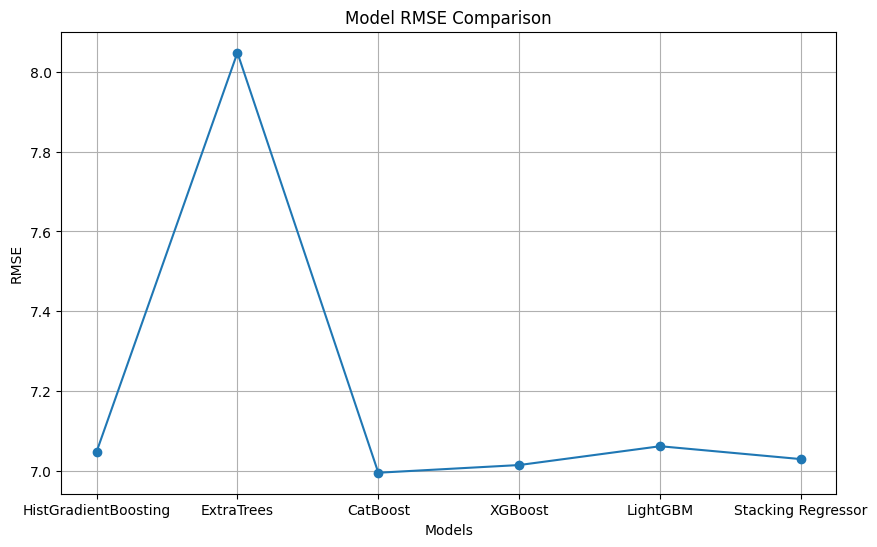

In [74]:
model_rmse = {
    'HistGradientBoosting': np.sqrt(-grid_hist_gb.best_score_),
    'ExtraTrees': np.sqrt(-grid_extra_trees.best_score_),
    'CatBoost': np.sqrt(-grid_catboost.best_score_),
    'XGBoost': np.sqrt(-grid_xgboost.best_score_),
    'LightGBM': np.sqrt(-grid_lightgbm.best_score_),
    'Stacking Regressor': rmse_holdout
}

plt.figure(figsize=(10, 6))
plt.plot(list(model_rmse.keys()), list(model_rmse.values()), marker='o')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.grid(True)
plt.show()

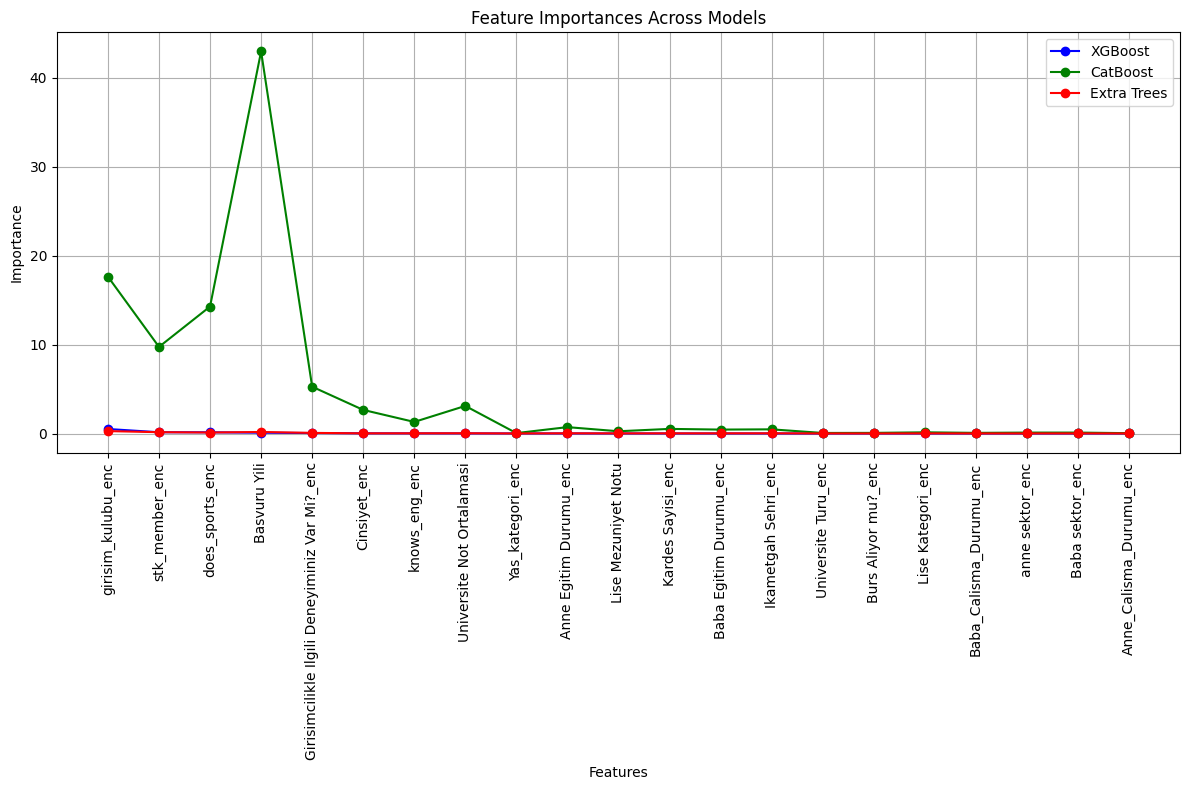

In [75]:
xgb_importances = best_xgboost.feature_importances_
catboost_importances = best_catboost.get_feature_importance()
rf_importances = best_extra_trees.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': features,
    'XGBoost': xgb_importances,
    'CatBoost': catboost_importances,
    'ExtraTrees': rf_importances
})

feature_importances_df = feature_importances_df.set_index('Feature').sort_values(by='XGBoost', ascending=False)

plt.figure(figsize=(12, 8))
plt.plot(feature_importances_df.index, feature_importances_df['XGBoost'], label='XGBoost', marker='o', color='b')
plt.plot(feature_importances_df.index, feature_importances_df['CatBoost'], label='CatBoost', marker='o', color='g')
plt.plot(feature_importances_df.index, feature_importances_df['ExtraTrees'], label='Extra Trees', marker='o', color='r')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances Across Models')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

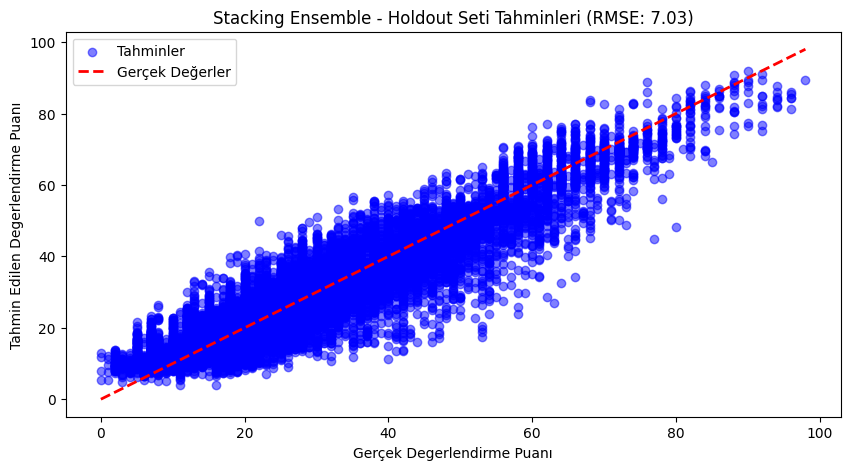

In [76]:
plt.figure(figsize=(10, 5))
plt.scatter(y_holdout, y_holdout_pred, alpha=0.5, color='blue', label='Tahminler')
plt.plot([y_holdout.min(), y_holdout.max()], [y_holdout.min(), y_holdout.max()], 'r--', lw=2, label='Gerçek Değerler')
plt.xlabel('Gerçek Degerlendirme Puanı')
plt.ylabel('Tahmin Edilen Degerlendirme Puanı')
plt.title(f'Stacking Ensemble - Holdout Seti Tahminleri (RMSE: {rmse_holdout:.2f})')
plt.legend()
plt.show()

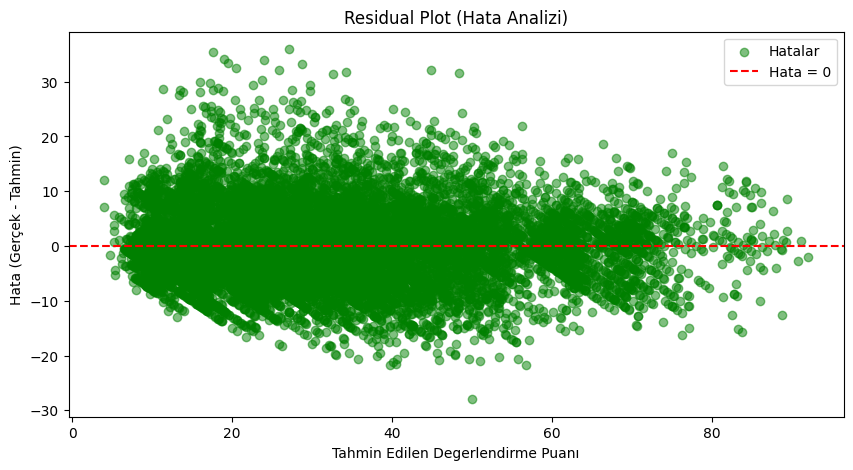

In [77]:
residuals = y_holdout - y_holdout_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_holdout_pred, residuals, alpha=0.5, color='green', label='Hatalar')
plt.axhline(y=0, color='red', linestyle='--', label='Hata = 0')
plt.xlabel('Tahmin Edilen Degerlendirme Puanı')
plt.ylabel('Hata (Gerçek - Tahmin)')
plt.title('Residual Plot (Hata Analizi)')
plt.legend()
plt.show()

# Submission

In [78]:
submission = pd.DataFrame({
    'id': datathon_test['id'],
    'Degerlendirme Puani': y_test_pred_final.flatten()
})

submission.to_csv('/kaggle/working/submission.csv', index=False)
print("Submission dosyası oluşturuldu:", os.path.exists('/kaggle/working/submission.csv'))

Submission dosyası oluşturuldu: True
